# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [44]:
print('1.1')
df = pd.read_csv("../data/airbnb_NYC.csv", encoding="latin1")
df.head()

1.1


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [45]:
# I removed $ and ,
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# I made sure to look at missing values before conversion
df['Price_nan'] = df['Price'].isnull()
print('Pre coercion summary: \n', df['Price'].describe(), '\n')

# I converted the column to a float so values were not represented as an object
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

print('Post coercion summary: \n', df['Price'].describe(), '\n')

# I checked for missing values after cleaning
# End up with 0 missing values after cleaning
print('Missing price values: \n', df['Price'].isnull().sum(), '\n')

Pre coercion summary: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 

Post coercion summary: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Missing price values: 
 0 



In [41]:
print('1.2')
df_police = pd.read_csv('../data/mn_police_use_of_force.csv')

# Proportion of missing values
prop_missing = df_police['subject_injury'].isnull().mean()
print(f"Proportion of missing subject_injury: {prop_missing:.2%}")

# Cross-tabulate with force_type to see patterns
ctab = pd.crosstab(df_police['force_type'], df_police['subject_injury'], 
                   dropna=False, margins=True)
print(ctab)

# Replace remaining NA with 'Missing'
df_police['subject_injury'] = df_police['subject_injury'].fillna('Missing')

1.2
Proportion of missing subject_injury: 76.19%
subject_injury                 No   Yes   NaN    All
force_type                                          
Baton                           0     2     2      4
Bodily Force                 1093  1286  7051   9430
Chemical Irritant             131    41  1421   1593
Firearm                         2     0     0      2
Gun Point Display              33    44    27    104
Improvised Weapon              34    40    74    148
Less Lethal                     0     0    87     87
Less Lethal Projectile          1     2     0      3
Maximal Restraint Technique     0     0   170    170
Police K9 Bite                  2    44    31     77
Taser                         150   172   985   1307
All                          1446  1631  9848  12925


In [42]:
df_police.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,Missing,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,Missing,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,Missing,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


The data that are missing tend to be under Bodily Force, Taser, Chemical Irritant, and Maximal Restraint Technique.

In [54]:
print('1.3')
df_metabric = pd.read_csv('../data/metabric.csv')

1.3


In [163]:
# I used .map() to transform 'Living' to 1 and 'Deceased' to 0
# This creates a dummy variable where 1 is survival
df_metabric['Survival_Dummy'] = df_metabric['Overall Survival Status'].map({'1:DECEASED': 1, '0: LIVING': 0})

# Display the first few rows to verify
print('First 5 rows of mapped survival status:')
print(df_metabric[['Overall Survival Status', 'Survival_Dummy']].head())

# Check for any unmapped values (would result in NaN)
print('\nMissing values in new dummy column:', df_metabric['Survival_Dummy'].isnull().sum())
df_metabric.head()

First 5 rows of mapped survival status:
  Overall Survival Status  Survival_Dummy
0                0:LIVING             NaN
1              1:DECEASED             1.0
2                0:LIVING             NaN
3              1:DECEASED             1.0
4              1:DECEASED             1.0

Missing values in new dummy column: 575


,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage,Survival_Dummy
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0,NaN
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0,1.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0,NaN
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0,1.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0,1.0


In [52]:
print('1.4')

# First, find how many review scores are missing
missing_reviews = df['Review Scores Rating'].isnull().sum()
print(f'Total missing review scores: {missing_reviews}')

# Calculate median from the data we have
rating_median = df['Review Scores Rating'].median()

# Create the new column with fillna
df['Review_Scores_Imputed'] = df['Review Scores Rating'].fillna(rating_median)
print(f'Imputation complete using median value: {rating_median}')
df.head()

1.4
Total missing review scores: 8323
Imputation complete using median value: 94.0


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Price_nan,Review_Scores_Imputed
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN,False,94.0
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN,False,94.0
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN,False,94.0
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,False,94.0
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,False,96.0


Imputing the median creates a bias in the results because it hides the diversity of data. Sometimes no review means it is bad, or could mean nothing at all.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [65]:
!python3 -m pip install xlrd pandas --break-system-packages

In [67]:
import sys
!{sys.executable} -m pip install xlrd --break-system-packages

  Using cached xlrd-2.0.2-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached xlrd-2.0.2-py2.py3-none-any.whl (96 kB)

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


In [71]:
import xlrd
print('2.1')
sharks = pd.read_excel('../data/GSAF5.xls', engine='xlrd')
sharks.head()
# pd.read_excel works

2.1


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
print('2.2')
sharks = sharks.dropna(axis=1, how='all')
print(sharks.columns.tolist())
print(f"Total columns: {len(sharks.columns)}")

2.2
['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ', 'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order']
Total columns: 21


**2.3**

An observation is one unique encounter between a human and a shark. Each row is a unique event showing details such as time, place, etc. It affects cleaning because you must decide whether to delete empty/duplicate rows and look at what values are missing and whether that information is critical to the observation itself. This affects analysis because you need to determine which observations are valid, so that means while cleaning, you have to decide if a valid row can have missing Year, Location, etc to still be used in your analysis.

2.4
Range of years: 1940.0 to 2026.0


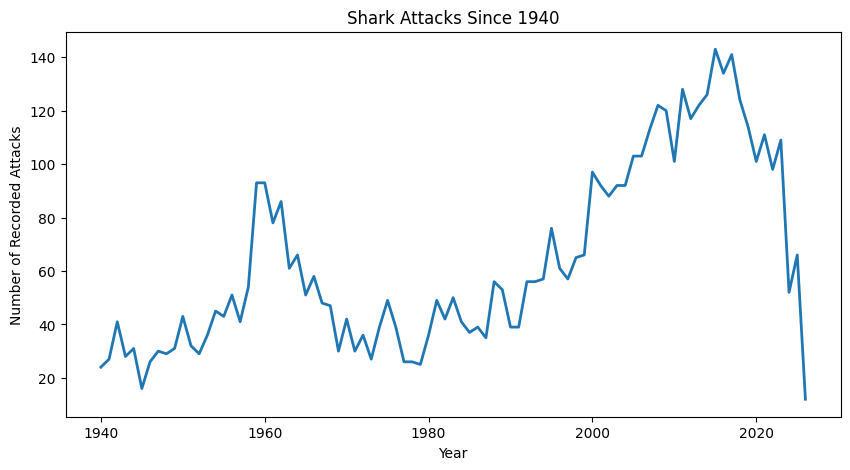

Attacks are increasing over time
2.5


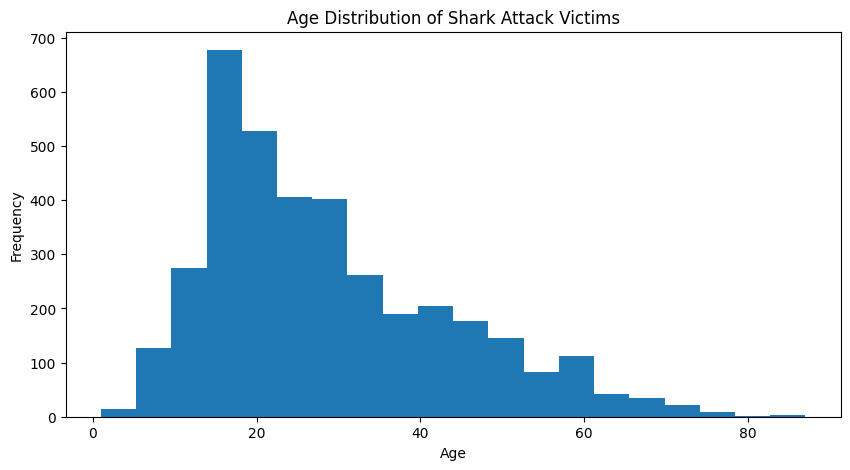

In [86]:
print('2.4')

sharks['Year'] = pd.to_numeric(sharks['Year'], errors='coerce')

# Description of the range
print(f"Range of years: {sharks['Year'].min()} to {sharks['Year'].max()}")

# Filter for attacks since 1940
sharks_modern = sharks[sharks['Year'] >= 1940].copy()

attacks_by_year = sharks_modern.groupby('Year').size()

plt.figure(figsize=(10, 5))
attacks_by_year.plot(kind='line', linewidth=2)
plt.title("Shark Attacks Since 1940")
plt.xlabel("Year")
plt.ylabel("Number of Recorded Attacks")
plt.show()

print('Attacks are increasing over time')


print('2.5')

sharks_modern['Age_Clean'] = sharks_modern['Age'].astype(str).str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 5))
sharks_modern['Age_Clean'].plot(kind='hist', bins=20)
plt.title("Age Distribution of Shark Attack Victims")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [99]:
print('2.6')

def clean_type(t):
    t = str(t).strip().capitalize()
    if 'Unprovoked' in t:
        return 'Unprovoked'
    elif 'Provoked' in t:
        return 'Provoked'
    else:
        return 'Unknown'

sharks_modern['Type_Clean'] = sharks_modern['Type'].apply(clean_type)

prop_unprovoked = (sharks_modern['Type_Clean'] == 'Unprovoked').mean()

print(f"Proportion of attacks that are unprovoked: {prop_unprovoked:.2%}")
print("\nValue counts for Type:")
print(sharks_modern['Type_Clean'].value_counts())

2.6
Proportion of attacks that are unprovoked: 74.50%

Value counts for Type:
Type_Clean
Unprovoked    4126
Unknown        889
Provoked       523
Name: count, dtype: int64


In [105]:
print('2.7')

fatal_col = [c for c in sharks.columns if 'Fatal' in c][0]
print(f"Found column name: '{fatal_col}'")

sharks = sharks.rename(columns={fatal_col: 'Fatal'})

print('Total Missings:', sharks['Fatal'].isnull().sum(), '\n')

def clean_fatal(t):
    t = str(t).strip().upper()
    if t == 'Y': return 'Y'
    if t == 'N': return 'N'
    return 'Unknown'

sharks['Fatal_Clean'] = sharks['Fatal'].apply(clean_fatal)
print('Unique values:', sharks['Fatal_Clean'].unique())

2.7
Found column name: 'Fatal'
Total Missings: 0 

Unique values: <StringArray>
['Y', 'N', 'Unknown']
Length: 3, dtype: str


In [107]:
print('2.8')

def clean_type(t):
    t = str(t).strip().capitalize()
    if 'Unprovoked' in t: return 'Unprovoked'
    if 'Provoked' in t: return 'Provoked'
    return 'Unknown'

sharks['Type_Clean'] = sharks['Type'].apply(clean_type)

mask = (sharks['Type_Clean'].isin(['Provoked', 'Unprovoked'])) & \
       (sharks['Fatal_Clean'].isin(['Y', 'N']))

comparison = pd.crosstab(sharks.loc[mask, 'Type_Clean'], 
                         sharks.loc[mask, 'Fatal_Clean'], 
                         normalize='index')

print("Fatality Rate by Type (N = No, Y = Yes):")
print(comparison)

2.8
The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.
Fatality Rate by Type (N = No, Y = Yes):
Fatal_Clean         N         Y
Type_Clean                     
Provoked     0.976424  0.023576
Unprovoked   0.829358  0.170642


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

**3.1**

This paper is about a key aspect of data cleaning: data tidying. Specifically, it focuses on how to tidy messes datasets by giving them a simple structure of each observation as a row and each variable as a column. Additionally, using the stated structure makes it easier to develop tools for the data tidying.

**3.2**

The tidy data standard intends to accomplish a "facilitated initial exploration and analysis of the data, and to simplify the development of data analysis tools that work well together".

**3.3**

What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." 
 - This sentence means that there is no one universal way that makes a dataset messy, they all are messy in different aspects (unique to the dataset).

What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
 - This sentence explains how it is easy to tell rows and columns apart when they are already sorted, because you can see that the rows are observations and the columns are variables. It is harder to define the two before the structure has been made because it can be organized differently. It clarifies that it is easier to describe relationships between variables than between rows, and it is easier to make comparisons between groups of observations than between groups of columns. 

**3.4**

Wickham defines values as numbers (when quantitative) or strings (when qualitative) and notes that they are organized in two ways. Wickham defines variables as part of what each value belongs to, and that they contain "all values that measure the same underlying attribute". Lastly, Wickham defines observations as the other part of what each value belongs to, and that "an observation contains all values measured on the same unit across attributes".

**3.5**

"Tidy Data" is defined as the standard way of mapping the meaning of a dataset to its structure where: each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

**3.6**

What are the 5 most common problems with messy datasets? 
 - The 5 most common problems with messy datasets are column headers are values and not variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, and a single observational unit is stored in multiple tables.

Why are the data in Table 4 messy? 
 - The data in Table 4 are messy because the columns are values and not variable names.

What is "melting" a dataset?
 - Melting a dataset is stacking it, or turning the columns into rows.

**3.7**

Table 11 is messy because its columns are not variables and are instead values, but table 12 tidy and "molten" because it follows the Tidy Data structure where variables are columns, observations are rows, and each type of observational unit is a table. 


**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

In [109]:
print('4.1')
gifts = pd.read_csv('../data/ForeignGifts_edu.csv')
gifts.head()

4.1


,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


4.2
count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


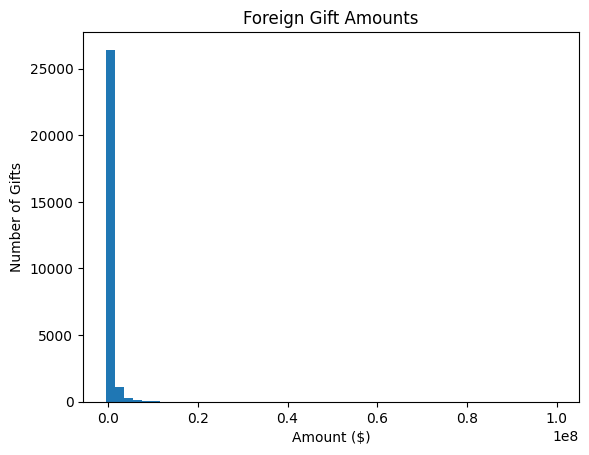

In [116]:
print('4.2')

print(gifts['Foreign Gift Amount'].describe())

gifts['Foreign Gift Amount'].plot(kind='hist', bins=50)
plt.title("Foreign Gift Amounts")
plt.xlabel("Amount ($)")
plt.ylabel("Number of Gifts")
plt.show()

4.3
Gift Type Proportions:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Gift Types')

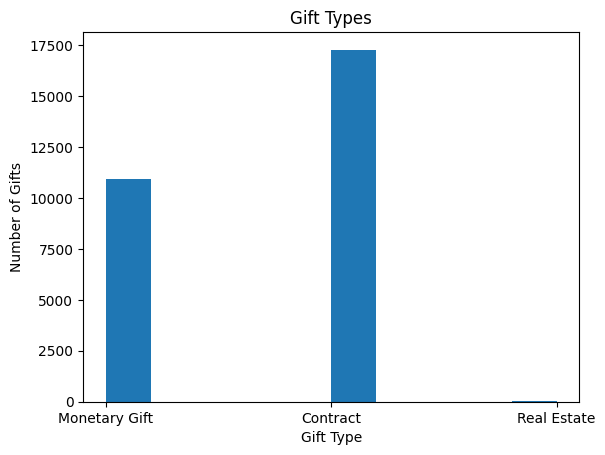

In [114]:
print('4.3')

gift_counts = gifts['Gift Type'].value_counts()
gift_proportions = gifts['Gift Type'].value_counts(normalize=True)

print("Gift Type Proportions:")
print(gift_proportions)

plt.hist(gifts['Gift Type'])
plt.xlabel("Gift Type")
plt.ylabel("Number of Gifts")
plt.title("Gift Types")

In [124]:
print('4.4')

top_countries_count = gifts.groupby('Country of Giftor').size().sort_values(ascending=False).head(15)
print("Top 15 Countries (Number of Gifts):\n", top_countries_count)

4.4
Top 15 Countries (Number of Gifts):
 Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64


In [125]:
top_countries_sum = gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("\nTop 15 Countries (Total Value):\n", top_countries_sum)


Top 15 Countries (Total Value):
 Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


4.5
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


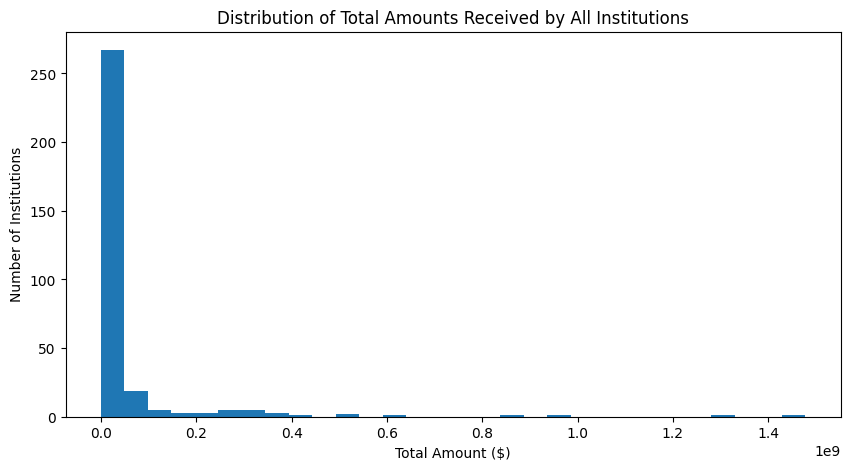

In [130]:
print('4.5')


inst_totals = gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)
print(inst_totals.head(15))

plt.figure(figsize=(10, 5))
inst_totals.plot(kind='hist', bins=30)
plt.title("Distribution of Total Amounts Received by All Institutions")
plt.xlabel("Total Amount ($)")
plt.ylabel("Number of Institutions")
plt.show()

In [132]:
print('4.6')

top_giftors = gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False)
top_giftors

4.6


Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
                                          ...    
Jeong, Yeoncheol                                1
Francois, Pierre                                1
Park, Kwanhong                                  1
Wu, Jinyan                                      1
Zhang, Stephanie                                1
Name: Foreign Gift Amount, Length: 8993, dtype: int64

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [133]:
print('5.1 and 5.2')
college = pd.read_csv("../data/college_completion.csv", encoding="latin1")
print(college.shape)
college.head()

5.1 and 5.2
(3798, 63)


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


There are 3798 observations and 63 variables.

In [134]:
print('5.3')
ctab = pd.crosstab(college['control'], college['level'])
print(ctab)

5.3
level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


Private not-for-profit institutions dominate the 4-year category. Public schools dominate the 2-year category.

5.4


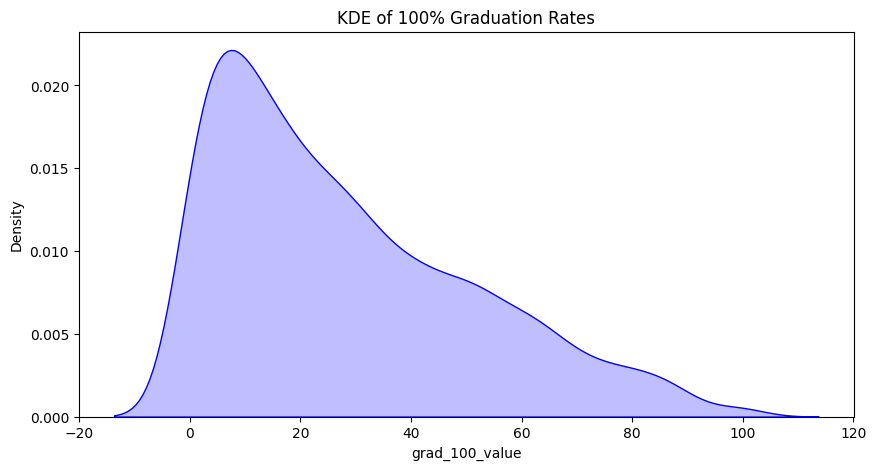

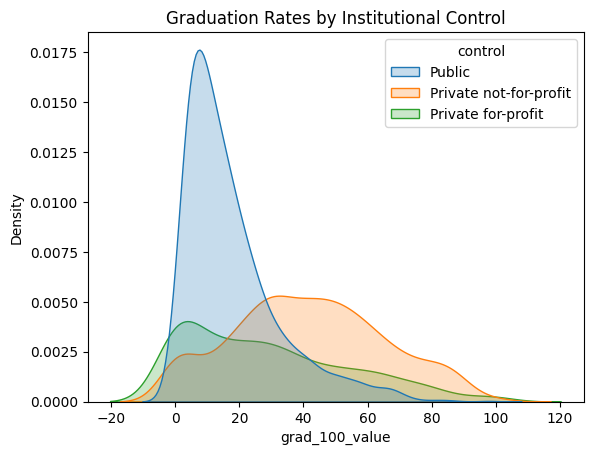

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  


In [135]:
print('5.4')
plt.figure(figsize=(10, 5))
sns.kdeplot(college['grad_100_value'], fill=True, color='blue')
plt.title("KDE of 100% Graduation Rates")
plt.show()

sns.kdeplot(data=college, x='grad_100_value', hue='control', fill=True)
plt.title("Graduation Rates by Institutional Control")
plt.show()

print(college.groupby('control')['grad_100_value'].describe())

Private not-for-profit have the most favorable graduation rates.

5.5


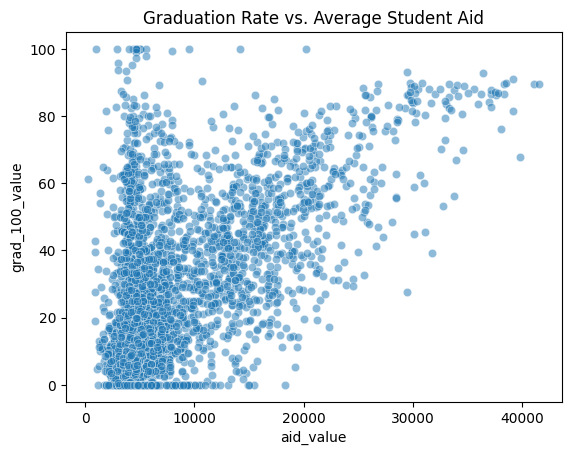

Overall Covariance: 88610.4831690244
Overall Correlation: 0.5758792845936078


In [138]:
print('5.5')

sns.scatterplot(data=college, x='aid_value', y='grad_100_value', alpha=0.5)
plt.title("Graduation Rate vs. Average Student Aid")
plt.show()

print("Overall Covariance:", college['grad_100_value'].cov(college['aid_value']))
print("Overall Correlation:", college['grad_100_value'].corr(college['aid_value']))

As student aid increases, graduation rates also tend to increase. This is not a very strong correlation, however.

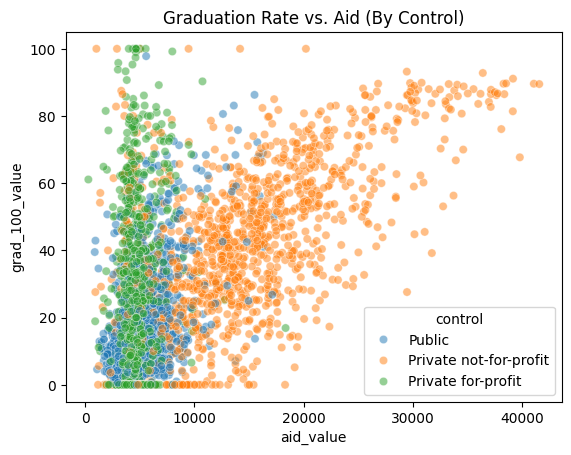

Statistics for Public
Correlation: 0.482
Covariance:  15355.146
------------------------------
Statistics for Private not-for-profit
Correlation: 0.602
Covariance:  109274.123
------------------------------
Statistics for Private for-profit
Correlation: 0.188
Covariance:  6897.525
------------------------------


In [141]:
sns.scatterplot(data=college, x='aid_value', y='grad_100_value', hue='control', alpha=0.5)
plt.title("Graduation Rate vs. Aid (By Control)")
plt.show()

for group in college['control'].unique():
    subset = college[college['control'] == group]
    
    corr = subset['grad_100_value'].corr(subset['aid_value'])
    cov = subset['grad_100_value'].cov(subset['aid_value'])
    
    print(f"Statistics for {group}")
    print(f"Correlation: {corr:.3f}")
    print(f"Covariance:  {cov:.3f}")
    print("-" * 30)

Private not-for-profit has the strongest correlation, meaning aid appears positively related to graduation rate. Public and private for-profit have the lowest correlation value, meaning a less strong position relationship between aid and graduation rate at those institutions. 

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

6.1

**Show:** $m(a + bX) = a + b \cdot m(X)$

**Proof:** By the definition of the sample mean:

$$m(a + bX) = \frac{1}{N} \sum_{i=1}^N (a + b x_i)$$

Distributing the summation:

$$= \frac{1}{N} \left[ \sum_{i=1}^N a + \sum_{i=1}^N b x_i \right]$$

Since $a$ is constant, $\sum_{i=1}^N a = Na$, and we can factor out constant $b$:

$$= \frac{1}{N} \left[ Na + b \sum_{i=1}^N x_i \right] = a + b \left( \frac{1}{N} \sum_{i=1}^N x_i \right) = a + b \cdot m(X)$$



6.2 

**Show:** $\text{cov}(X, X) = s^2$

**Proof:** By definition:

$$\text{cov}(X,X) = \frac{1}{N} \sum_{i=1}^N (x_i - m(X))(x_i - m(X)) = \frac{1}{N} \sum_{i=1}^N (x_i - m(X))^2 = s^2$$



6.3 

**Show:** $\text{cov}(X, a + bY) = b \cdot \text{cov}(X, Y)$

**Proof:** From Part 1, we know $m(a + bY) = a + b \cdot m(Y)$.

$$\text{cov}(X, a + bY) = \frac{1}{N} \sum_{i=1}^N (x_i - m(X))[(a + b y_i) - (a + b \cdot m(Y))]$$

The constant $a$ cancels:

$$= \frac{1}{N} \sum_{i=1}^N (x_i - m(X))(b y_i - b \cdot m(Y)) = b \cdot \frac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))$$

$$= b \cdot \text{cov}(X, Y)$$



6.4 

**Show:** $\text{cov}(a + bX, a + bY) = b^2 \cdot \text{cov}(X, Y)$

**Proof:** Constants cancel in covariance, so:

$$\text{cov}(a + bX, a + bY) = \text{cov}(bX, bY)$$

$$= \frac{1}{N} \sum_{i=1}^N [b(x_i - m(X))][b(y_i - m(Y))] = b^2 \cdot \frac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))$$

$$= b^2 \cdot \text{cov}(X, Y)$$



6.5 

**Median (if $b > 0$):** Linear transformations keep rank order, so:

$$\text{med}(a + bX) = a + b \cdot \text{med}(X) \quad \$$

**IQR:** The constant $a$ cancels out in the difference:

$$\text{IQR}(a + bX) = (a + bQ_3) - (a + bQ_1) = b(Q_3 - Q_1) = b \cdot \text{IQR}(X)$$

So $\text{IQR}(a + bX) \neq a + b \cdot \text{IQR}(X)$ in general



6.6 

**Claim:** $m(X^2) \neq (m(X))^2$ and $m(\sqrt{X}) \neq \sqrt{m(X)}$ in general.

**Example:** Let $X = \{2, 4\}$.

- $m(X) = \frac{2 + 4}{2} = 3$
- $m(X^2) = \frac{4 + 16}{2} = 10$
- $(m(X))^2 = 3^2 = 9$

Since $10 \neq 9$, these properties only apply to linear transformations

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [142]:
print('7.1')

ames = pd.read_csv('../data/ames_prices.csv')
ames.head()

7.1


,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


7.2
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64


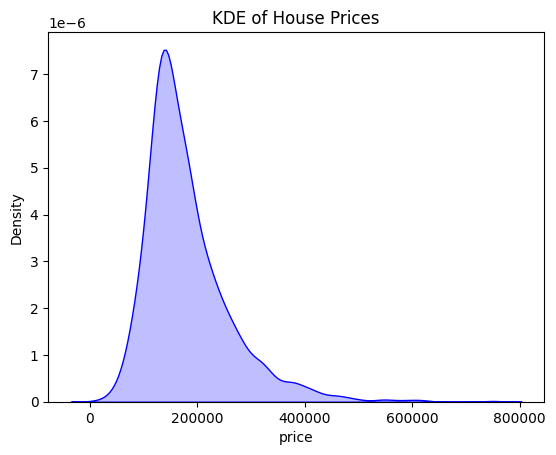

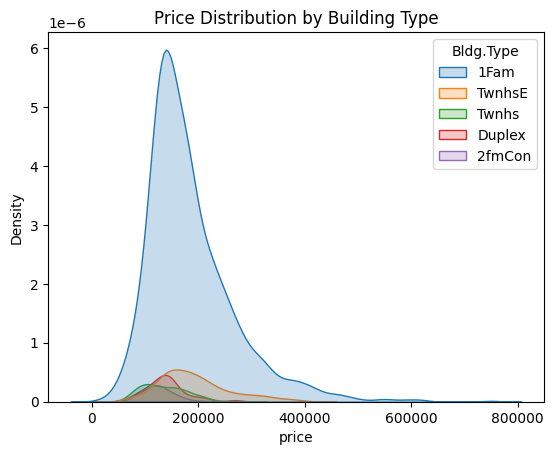


 Price Stats by Building Type
            count           mean           std      min       25%       50%  \
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0  


In [144]:
print('7.2')
print(ames['price'].describe())

sns.kdeplot(ames['price'], fill=True, color='blue')
plt.title("KDE of House Prices")
plt.show()

sns.kdeplot(data=ames, x='price', hue='Bldg.Type', fill=True)
plt.title("Price Distribution by Building Type")
plt.show()

print("\n Price Stats by Building Type")
bldg_stats = ames.groupby('Bldg.Type')['price'].describe()
print(bldg_stats)

The most expensive buildings on average are 1 family homes. The buildings with the highest variance in transaction prices are also 1 family homes.

7.3


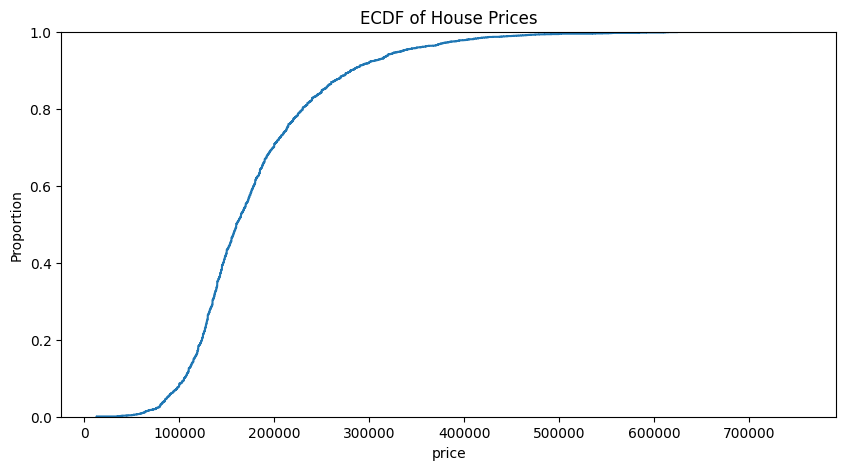


 5-Number Summary
Min        12789.0
25%       129500.0
Median    160000.0
75%       213500.0
Max       755000.0
Name: price, dtype: float64


In [145]:
print('7.3')

plt.figure(figsize=(10, 5))
sns.ecdfplot(data=ames, x='price')
plt.title("ECDF of House Prices")
plt.show()

summary_5 = ames['price'].quantile([0, 0.25, 0.5, 0.75, 1])
summary_5.index = ['Min', '25%', 'Median', '75%', 'Max']
print("\n 5-Number Summary")
print(summary_5)

7.4


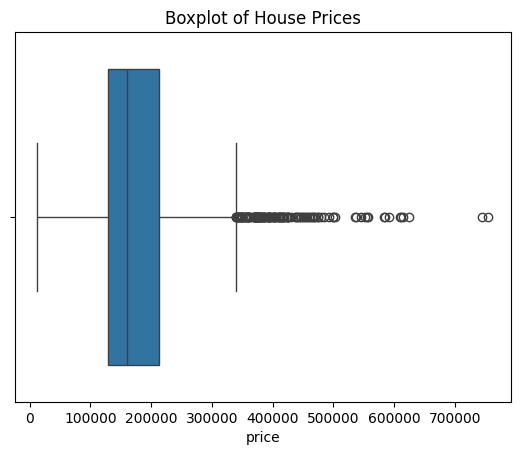

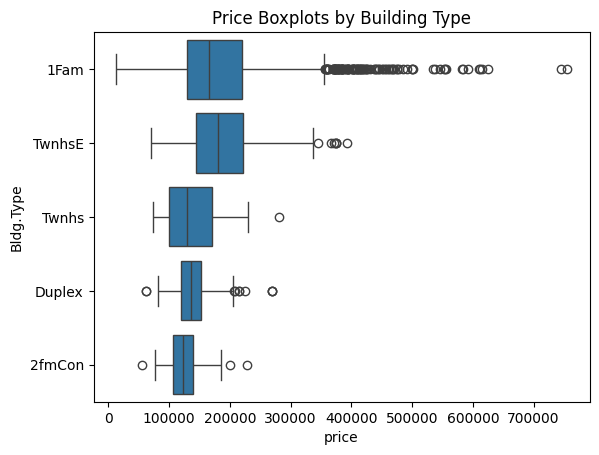

In [148]:
print('7.4')
sns.boxplot(x=ames['price'])
plt.title("Boxplot of House Prices")
plt.show()

sns.boxplot(data=ames, x='price', y='Bldg.Type')
plt.title("Price Boxplots by Building Type")
plt.show()

1 Family homes have the most outliers, and Twnhs has the least outliers. The buildings with the largest IQRs 1 family homes and townhouses and Duplexes and 2fmCon have the lowest IQR.

In [161]:
print('7.5')

Q1 = ames['price'].quantile(0.25)
Q3 = ames['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

ames['is_outlier'] = ((ames['price'] < lower_bound) | (ames['price'] > upper_bound)).astype(int)

print(f"Number of outliers detected: {ames['is_outlier'].sum()}")
ames.head()

7.5
Number of outliers detected: 137


,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,is_outlier,price_winsor
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,NaN,NaN,NaN,0,5,2010,WD,Normal,0,215000
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0,105000
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0,172000
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,NaN,NaN,NaN,0,4,2010,WD,Normal,0,244000
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0,189900


7.6

 Original Price Stats
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

 Winsorized Price Stats
count      2930.000000
mean     177632.528669
std       66195.453960
min       87500.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      335000.000000
Name: price_winsor, dtype: float64


/opt/homebrew/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4786: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


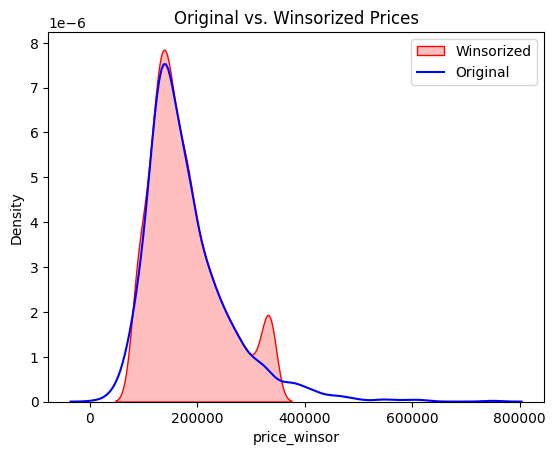

In [160]:
print('7.6')

ames['price_winsor'] = winsorize(ames['price'], limits=[0.05, 0.05])

print("\n Original Price Stats")
print(ames['price'].describe())

print("\n Winsorized Price Stats")
print(ames['price_winsor'].describe())

sns.kdeplot(ames['price_winsor'], fill=True, color='red', label='Winsorized')
sns.kdeplot(ames['price'], fill=False, color='blue', label='Original')
plt.title("Original vs. Winsorized Prices")
plt.legend()
plt.show()

The results change as the standard deviation decreases a lot from the original price, and the mean also decreases slightly from the original cost.